<a href="https://colab.research.google.com/github/bskarthik05/Task_4/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

In [49]:
try:
    df = pd.read_csv('/content/sample_data/data.csv')
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please upload the file to your Colab environment.")
    # Exit or raise an exception if the file is critical and not found
    raise SystemExit("Exiting: data.csv not found.")

In [50]:
print("--- Initial Data Exploration ---")
print("First 5 rows of the dataset:")
print(df.head())

--- Initial Data Exploration ---
First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   



In [51]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

In [52]:
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

In [53]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

In [54]:
if 'Unnamed: 32' in df.columns:
    print("Dropping 'Unnamed: 32' column as it contains only NaN values.")
    df = df.drop('Unnamed: 32', axis=1)
if 'id' in df.columns:
    print("Dropping 'id' column as it is an identifier.")
    df = df.drop('id', axis=1)

Dropping 'Unnamed: 32' column as it contains only NaN values.
Dropping 'id' column as it is an identifier.


In [55]:
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        print(f"Imputing missing values in '{col}' with mean.")
        df[col] = df[col].fillna(df[col].mean())

In [56]:
TARGET_COL = 'diagnosis'

In [57]:
if TARGET_COL not in df.columns:
    print(f"Error: Target column '{TARGET_COL}' not found in the DataFrame.")
    print("Please ensure your CSV has the correct target column or adjust TARGET_COL variable.")
    # Exit or raise error
    raise SystemExit(f"Exiting: Target column '{TARGET_COL}' not found.")
else:
    print(f"Value counts for the target variable ('{TARGET_COL}') before mapping:")
    print(df[TARGET_COL].value_counts())

Value counts for the target variable ('diagnosis') before mapping:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [58]:
    try:
        df[TARGET_COL] = df[TARGET_COL].map({'M': 1, 'B': 0})
        print(f"Value counts for the target variable ('{TARGET_COL}') after mapping (M=1, B=0):")
        print(df[TARGET_COL].value_counts())
    except Exception as e:
        print(f"Error mapping target variable: {e}")
        print("Please ensure the target column contains 'M' and 'B' values or adjust mapping.")
        raise SystemExit("Exiting: Error during target variable mapping.")

Value counts for the target variable ('diagnosis') after mapping (M=1, B=0):
diagnosis
0    357
1    212
Name: count, dtype: int64


In [59]:
    if not df[TARGET_COL].nunique() == 2:
        print(f"Warning: Target column '{TARGET_COL}' does not seem to be binary after mapping. Logistic regression is typically used for binary classification.")
        # Consider how to handle this: binarize or choose a different model/target.
    elif df[TARGET_COL].isnull().any():
        print(f"Warning: Target column '{TARGET_COL}' contains NaN values after mapping. This might indicate unmapped original values.")
        print("Please check the original values in the 'diagnosis' column.")
        raise SystemExit("Exiting: NaN values in target column after mapping.")

In [60]:
    X = df.drop(TARGET_COL, axis=1)
    y = df[TARGET_COL]

In [61]:
    X_numeric_check = X.select_dtypes(include=np.number)
    if X_numeric_check.shape[1] != X.shape[1]:
        print("Warning: Non-numeric columns detected in features. Selecting only numeric columns.")
        print(f"Original feature columns: {X.columns.tolist()}")
        X = X_numeric_check
        if X.shape[1] == 0:
            print("Error: No numeric features found after selection. Please check your data.")
            raise SystemExit("Exiting: No numeric features for modeling.")
    elif X.shape[1] == 0:
        print("Error: No features found after dropping target and ID. Please check your data processing steps.")
        raise SystemExit("Exiting: No features for modeling.")


In [62]:
    print("Selected features for the model:")
    print(X.columns.tolist())

Selected features for the model:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [63]:
    print("--- Splitting Data and Standardizing Features ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

--- Splitting Data and Standardizing Features ---


In [64]:
    print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(455, 30), y_train=(455,)
Test set shape: X_test=(114, 30), y_test=(114,)


In [65]:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In [66]:
    print("--- Training Logistic Regression Model ---")
    log_reg_model = LogisticRegression(solver='liblinear', random_state=42) # liblinear is good for smaller datasets
    log_reg_model.fit(X_train_scaled, y_train)
    print("Model training complete.")

--- Training Logistic Regression Model ---
Model training complete.


In [67]:
    print("--- Model Evaluation ---")
    y_pred = log_reg_model.predict(X_test_scaled)
    y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

--- Model Evaluation ---


In [68]:
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (0=Benign, 1=Malignant):")
    print(cm)

Confusion Matrix (0=Benign, 1=Malignant):
[[71  1]
 [ 2 40]]


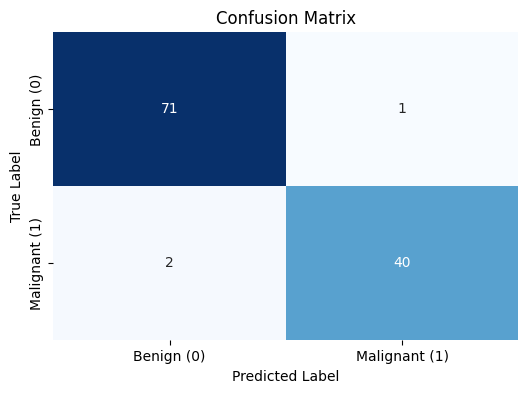

In [69]:
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign (0)', 'Malignant (1)'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [70]:
    print("Classification Report (0=Benign, 1=Malignant):")
    print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

Classification Report (0=Benign, 1=Malignant):
               precision    recall  f1-score   support

   Benign (0)       0.97      0.99      0.98        72
Malignant (1)       0.98      0.95      0.96        42

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



In [71]:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9960


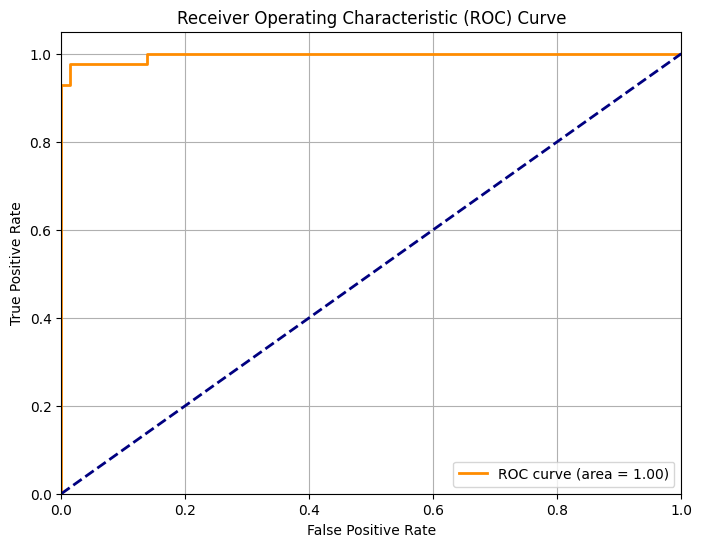

In [72]:
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [73]:
    print("--- Threshold Tuning ---")
    print("Logistic Regression's .predict() method uses a default threshold of 0.5 on the predicted probabilities.")
    print("We can adjust this threshold to balance precision and recall based on the specific problem needs.")

--- Threshold Tuning ---
Logistic Regression's .predict() method uses a default threshold of 0.5 on the predicted probabilities.
We can adjust this threshold to balance precision and recall based on the specific problem needs.


In [74]:
    thresholds_custom = np.arange(0.1, 1.0, 0.1)
    print("Metrics for different thresholds (for Malignant class):")
    print("Threshold | Precision | Recall   | F1-Score")
    print("-------------------------------------------")
    for t in thresholds_custom:
        custom_preds = (y_pred_proba >= t).astype(int)
        report = classification_report(y_test, custom_preds, output_dict=True, zero_division=0, target_names=['Benign (0)', 'Malignant (1)'])
        precision_1 = report.get('Malignant (1)', {}).get('precision', 0)
        recall_1 = report.get('Malignant (1)', {}).get('recall', 0)
        f1_1 = report.get('Malignant (1)', {}).get('f1-score', 0)
        print(f"{t:.1f}       | {precision_1:.4f}    | {recall_1:.4f}   | {f1_1:.4f}")

Metrics for different thresholds (for Malignant class):
Threshold | Precision | Recall   | F1-Score
-------------------------------------------
0.1       | 0.8913    | 0.9762   | 0.9318
0.2       | 0.9111    | 0.9762   | 0.9425
0.3       | 0.9762    | 0.9762   | 0.9762
0.4       | 0.9756    | 0.9524   | 0.9639
0.5       | 0.9756    | 0.9524   | 0.9639
0.6       | 1.0000    | 0.9048   | 0.9500
0.7       | 1.0000    | 0.9048   | 0.9500
0.8       | 1.0000    | 0.8571   | 0.9231
0.9       | 1.0000    | 0.7857   | 0.8800


In [75]:
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
    thresholds_pr_plot = thresholds_pr

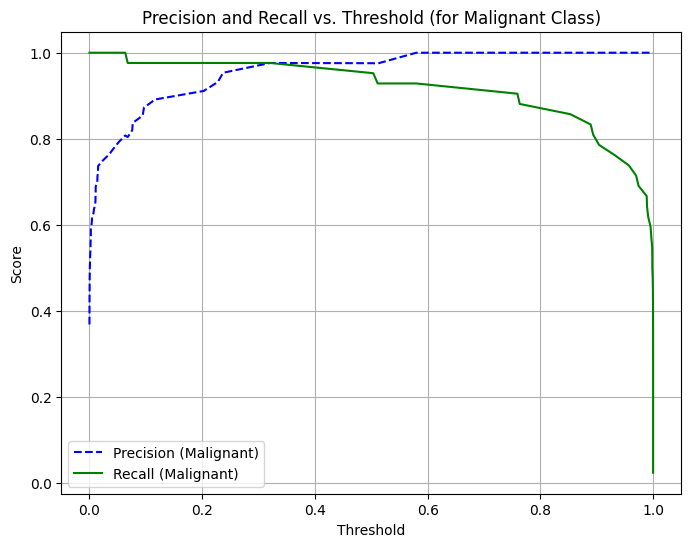

You can choose a threshold that optimizes for precision, recall, or a balance (like F1-score), depending on your business objective.


In [76]:
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds_pr_plot, precision[:-1], "b--", label="Precision (Malignant)")
    plt.plot(thresholds_pr_plot, recall[:-1], "g-", label="Recall (Malignant)")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Precision and Recall vs. Threshold (for Malignant Class)")
    plt.grid(True)
    plt.show()
    print("You can choose a threshold that optimizes for precision, recall, or a balance (like F1-score), depending on your business objective.")


In [77]:
    def sigmoid(z_val):
        return 1 / (1 + np.exp(-z_val))

In [78]:
    z_values = np.linspace(-10, 10, 200)
    sigmoid_values = sigmoid(z_values)

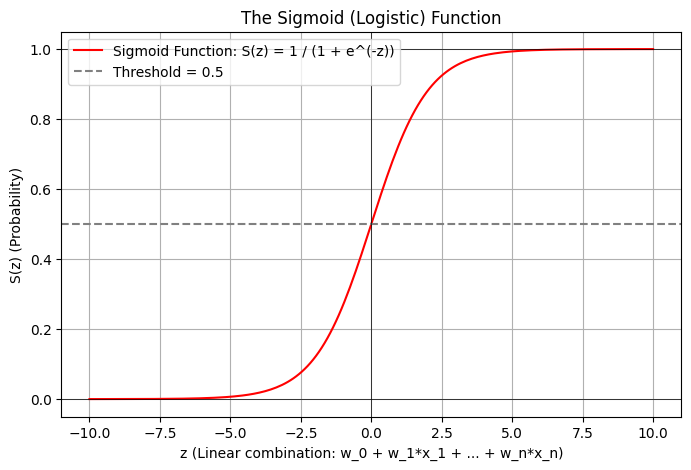

In [79]:
    plt.figure(figsize=(8, 5))
    plt.plot(z_values, sigmoid_values, label='Sigmoid Function: S(z) = 1 / (1 + e^(-z))', color='red')
    plt.axhline(0.5, color='grey', linestyle='--', label='Threshold = 0.5')
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
    plt.axhline(1, color='black', linestyle='-', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='-', linewidth=0.5)
    plt.title('The Sigmoid (Logistic) Function')
    plt.xlabel('z (Linear combination: w_0 + w_1*x_1 + ... + w_n*x_n)')
    plt.ylabel('S(z) (Probability)')
    plt.legend()
    plt.grid(True)
    plt.show()